In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


df = pd.read_csv("earthquake_data_tsunami.csv")
print("\nВ данной работе целью является прогноз возникновения цунами, следовательно целевым классом является tsunami")
target = 'tsunami'
print("\nУникальные значения целевого признака 'tsunami':", df['tsunami'].unique())
print("\nРазмер датасета:", df.shape, "\n")


В данной работе целью является прогноз возникновения цунами, следовательно целевым классом является tsunami

Уникальные значения целевого признака 'tsunami': [1 0]

Размер датасета: (782, 13) 




Первые 5 строк датасета:
   magnitude  cdi  mmi  sig  nst    depth  latitude  longitude  tsunami
0        7.0    8    7  768  117   14.000   -9.7963    159.596        1
1        6.9    4    4  735   99   25.000   -4.9559    100.738        0
2        7.0    3    3  755  147  579.000  -20.0508   -178.346        1
3        7.3    5    5  833  149   37.000  -19.2918   -172.129        1
4        6.6    0    2  670  131  624.464  -25.5948    178.278        1

Сводная таблица распределения классов:
         Количество  Процент (%)
tsunami                         
0               478        61.13
1               304        38.87


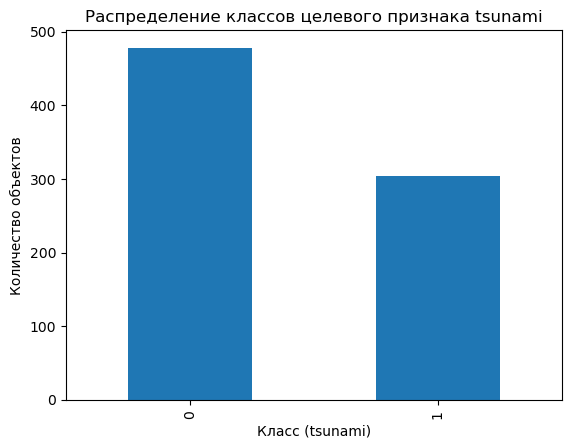


Отношение меньшего класса к большему: 0.636
Датасет сбалансирован


In [49]:
print("\nПервые 5 строк датасета:")
print(df.drop(columns=['Year', 'Month', 'dmin', 'gap']).head())

class_counts = df[target].value_counts()
class_percent = df[target].value_counts(normalize=True) * 100
balance_df = pd.DataFrame({
    'Количество': class_counts,
    'Процент (%)': class_percent.round(2)
})

print("\nСводная таблица распределения классов:")
print(balance_df)

plt.figure()
df[target].value_counts().plot(kind='bar')
plt.xlabel('Класс (tsunami)')
plt.ylabel('Количество объектов')
plt.title('Распределение классов целевого признака tsunami')
plt.show()


minority_ratio = class_counts.min() / class_counts.max()
print(f"\nОтношение меньшего класса к большему: {minority_ratio:.3f}")

if minority_ratio < 0.5:
    print("Датасет несбалансирован")
else:
    print("Датасет сбалансирован")

Размер обучающей выборки: (547, 12)
Размер тестовой выборки: (235, 12)

===== kNN =====
Accuracy: 0.851063829787234

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       144
           1       0.78      0.86      0.82        91

    accuracy                           0.85       235
   macro avg       0.84      0.85      0.85       235
weighted avg       0.86      0.85      0.85       235

Confusion matrix:


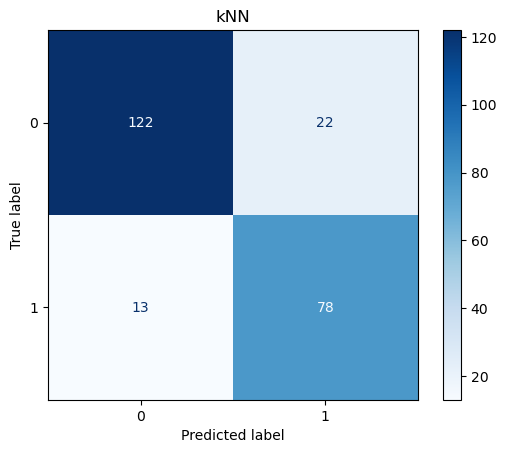

In [59]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\n===== kNN =====")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=[0, 1]).plot(cmap='Blues')
plt.title('kNN')
plt.show()


===== Decision Tree =====
Accuracy: 0.9191489361702128

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       144
           1       0.86      0.95      0.90        91

    accuracy                           0.92       235
   macro avg       0.91      0.92      0.92       235
weighted avg       0.92      0.92      0.92       235



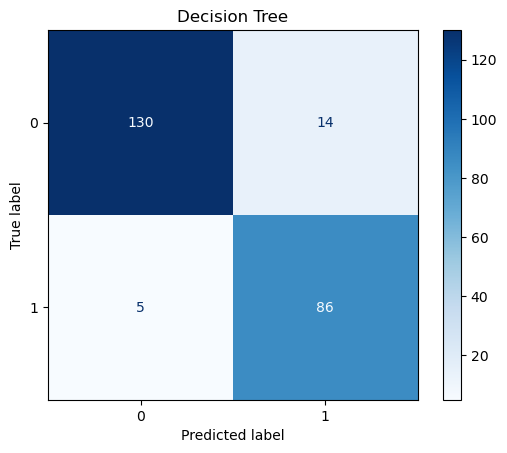

In [51]:
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n===== Decision Tree =====")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification report:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=[0, 1]).plot(cmap='Blues')
plt.title('Decision Tree')
plt.show()

results = pd.DataFrame({
    'Алгоритм': ['kNN', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ]
})


Сравнение алгоритмов:
        Алгоритм  Accuracy
0            kNN  0.851064
1  Decision Tree  0.919149


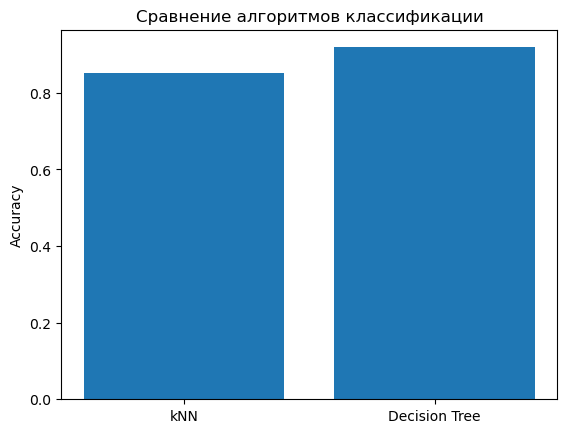

In [52]:
print("\nСравнение алгоритмов:")
print(results)

plt.figure()
plt.bar(results['Алгоритм'], results['Accuracy'])
plt.ylabel('Accuracy')
plt.title('Сравнение алгоритмов классификации')
plt.show()

Сравнение моделей по метрикам:
        Модель  Accuracy  Precision  Recall  F1-Score
           kNN    0.8511     0.8558  0.8511    0.8522
Дерево решений    0.9191     0.9231  0.9191    0.9197


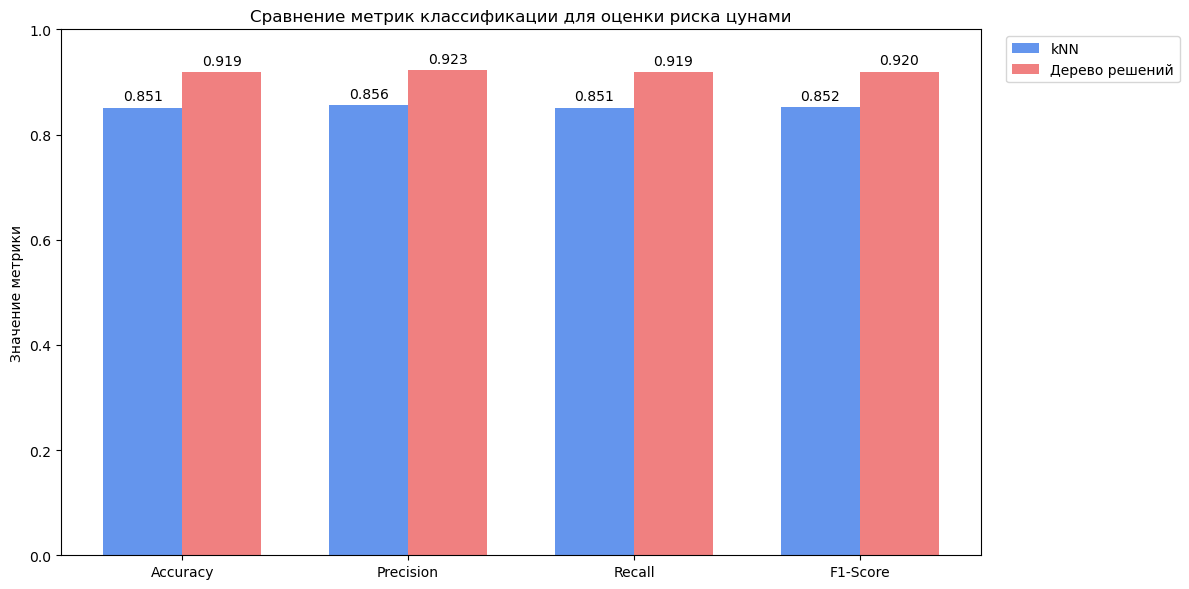

In [53]:
models = ['kNN', 'Дерево решений']

accuracy_scores = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt)
]
precision_scores = [
    precision_score(y_test, y_pred_knn, average='weighted'),
    precision_score(y_test, y_pred_dt, average='weighted')
]
recall_scores = [
    recall_score(y_test, y_pred_knn, average='weighted'),
    recall_score(y_test, y_pred_dt, average='weighted')
]
f1_scores = [
    f1_score(y_test, y_pred_knn, average='weighted'),
    f1_score(y_test, y_pred_dt, average='weighted')
]

comparison_df = pd.DataFrame({
    'Модель': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

print("Сравнение моделей по метрикам:")
print(comparison_df.round(4).to_string(index=False))


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(
    x - width/2,
    comparison_df.iloc[0, 1:],
    width,
    label='kNN',
    color='cornflowerblue'
)

rects2 = ax.bar(
    x + width/2,
    comparison_df.iloc[1, 1:],
    width,
    label='Дерево решений',
    color='lightcoral'
)

ax.set_ylabel('Значение метрики')
ax.set_title('Сравнение метрик классификации для оценки риска цунами')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
ax.set_ylim(0, 1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.3f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom'
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

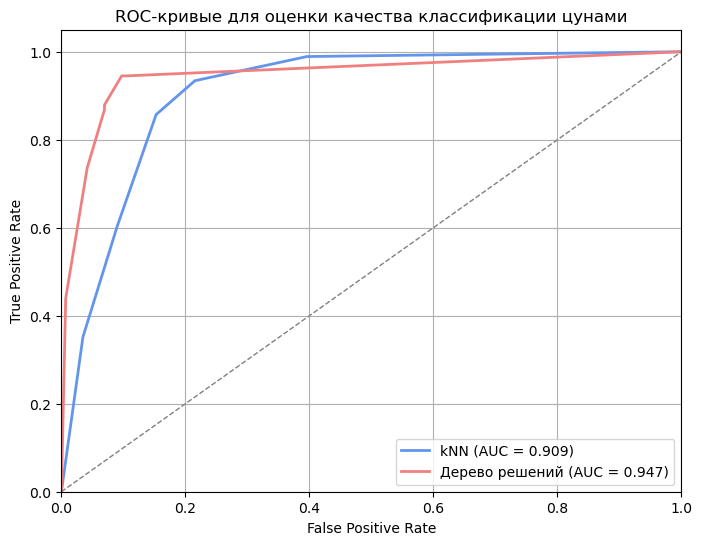

Средний AUC kNN: 0.9088
Средний AUC Дерева решений: 0.9473


In [54]:
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_prob_dt = dt.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, color='cornflowerblue', lw=2,
         label=f'kNN (AUC = {roc_auc_knn:.3f})')
plt.plot(fpr_dt, tpr_dt, color='lightcoral', lw=2,
         label=f'Дерево решений (AUC = {roc_auc_dt:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для оценки качества классификации цунами')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Средний AUC kNN: {roc_auc_knn:.4f}")
print(f"Средний AUC Дерева решений: {roc_auc_dt:.4f}")

In [55]:
print("Выводе по работе")
print("\n1. Анализ данных:")
print(f"Целевой атрибут: {target}")
print("Использованы признаки: magnitude, depth, latitude, longitude, cdi, mmi, sig, dmin, gap")
print("Выборка разделена на 70% обучающую и 30% тестовую")

print("\n2. Результаты классификации:")
print("kNN:")
print(f"- Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"- F1-score: {f1_score(y_test, y_pred_knn, average='weighted'):.3f}")
print(f"- Средний AUC: {roc_auc_knn:.3f}")

print("Дерево решений:")
print(f"- Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(f"- F1-score: {f1_score(y_test, y_pred_dt, average='weighted'):.3f}")
print(f"- Средний AUC: {roc_auc_dt:.3f}")

print("\n3. Сравнительный анализ:")
print("Обе модели показывают высокое качество классификации")
print("Дерево решений немного точнее по accuracy и F1-score")
print("kNN демонстрирует более высокую чувствительность к классу 'цунами' (recall)")

print("\n4. ROC-анализ:")
print("ROC-кривые обеих моделей выше случайного классификатора")
print("Высокие значения AUC (>0.9) свидетельствуют о хорошей способности различать события цунами и их отсутствие")


Выводе по работе

1. Анализ данных:
Целевой атрибут: tsunami
Использованы признаки: magnitude, depth, latitude, longitude, cdi, mmi, sig, dmin, gap
Выборка разделена на 70% обучающую и 30% тестовую

2. Результаты классификации:
kNN:
- Accuracy: 0.851
- F1-score: 0.852
- Средний AUC: 0.909
Дерево решений:
- Accuracy: 0.919
- F1-score: 0.920
- Средний AUC: 0.947

3. Сравнительный анализ:
Обе модели показывают высокое качество классификации
Дерево решений немного точнее по accuracy и F1-score
kNN демонстрирует более высокую чувствительность к классу 'цунами' (recall)

4. ROC-анализ:
ROC-кривые обеих моделей выше случайного классификатора
Высокие значения AUC (>0.9) свидетельствуют о хорошей способности различать события цунами и их отсутствие
